In [14]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [15]:
import json

with open('data/train.json') as fp:
    train = json.load(fp)
labels = train['annotations'][:100000]

In [16]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

In [17]:
i = 381

{'labelId': ['62', '17', '66', '186', '171', '133'], 'imageId': '382'}
Predicted: [('n03770439', 'miniskirt', 0.7386888), ('n03710721', 'maillot', 0.071359806), ('n03710637', 'maillot', 0.05725599), ('n03594734', 'jean', 0.0270379), ('n03450230', 'gown', 0.014160234)]


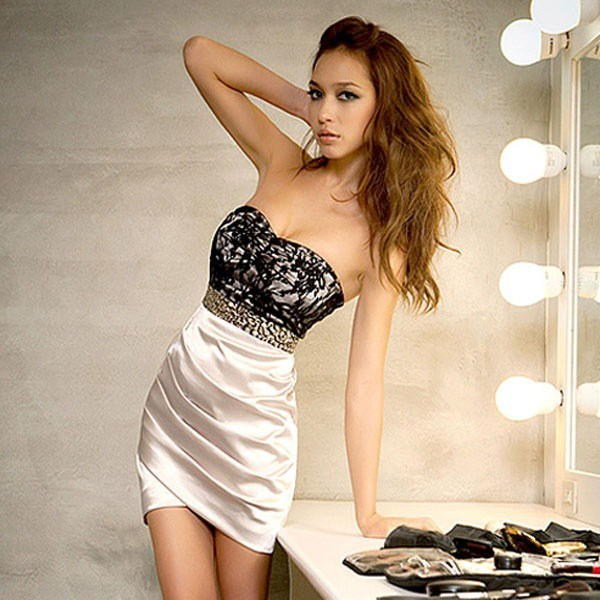

In [18]:
i +=1
image_path = f'images/{i}.jpg'
print(tuple(filter(lambda x: x['imageId'] == str(i), labels))[0])
img = image.load_img(image_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

print('Predicted:', decode_predictions(preds)[0])
Image(image_path)

In [19]:
preds.sum()

1.0000001

In [20]:
sorted([s for s in model.__dir__() if not s.startswith('_')])

['add_loss',
 'add_update',
 'add_weight',
 'assert_input_compatibility',
 'build',
 'built',
 'call',
 'compile',
 'compute_mask',
 'compute_output_shape',
 'count_params',
 'evaluate',
 'evaluate_generator',
 'fit',
 'fit_generator',
 'from_config',
 'get_config',
 'get_input_at',
 'get_input_mask_at',
 'get_input_shape_at',
 'get_layer',
 'get_losses_for',
 'get_output_at',
 'get_output_mask_at',
 'get_output_shape_at',
 'get_updates_for',
 'get_weights',
 'input',
 'input_layers',
 'input_layers_node_indices',
 'input_layers_tensor_indices',
 'input_mask',
 'input_names',
 'input_shape',
 'input_spec',
 'inputs',
 'layers',
 'layers_by_depth',
 'load_weights',
 'losses',
 'name',
 'non_trainable_weights',
 'output',
 'output_layers',
 'output_layers_node_indices',
 'output_layers_tensor_indices',
 'output_mask',
 'output_names',
 'output_shape',
 'outputs',
 'predict',
 'predict_function',
 'predict_generator',
 'predict_on_batch',
 'reset_states',
 'run_internal_graph',
 'save',
 

In [21]:
ResNet50()

In [22]:
from keras import losses

In [23]:
model.add_loss(losses.binary_crossentropy)

In [24]:
model.layers

In [12]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [29]:
df = pd.DataFrame(train['annotations'])
mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df['labelId']),
                          columns=mlb.classes_,
                          index=df.index))
df = df.drop('labelId', axis=1)
df

,imageId,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,9,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,10,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
train['annotations']

[{'imageId': '1', 'labelId': ['95', '66', '137', '70', '20']},
 {'imageId': '2', 'labelId': ['36', '66', '44', '214', '105', '133']},
 {'imageId': '3', 'labelId': ['170', '66', '97', '153', '105', '138']},
 {'imageId': '4', 'labelId': ['18', '66', '44', '153', '164']},
 {'imageId': '5',
  'labelId': ['189', '66', '176', '137', '153', '74', '181', '171', '138']},
 {'imageId': '6', 'labelId': ['190', '106', '53', '153', '164', '184']},
 {'imageId': '7', 'labelId': ['114', '222', '113', '176', '214', '87']},
 {'imageId': '8',
  'labelId': ['18', '17', '66', '44', '98', '49', '110', '105']},
 {'imageId': '9', 'labelId': ['66', '97', '153', '181', '105', '218']},
 {'imageId': '10', 'labelId': ['91', '66', '59', '49', '151', '105', '225']},
 {'imageId': '11', 'labelId': ['170', '79', '66', '44', '214', '2']},
 {'imageId': '12', 'labelId': ['15', '66', '176', '137', '135']},
 {'imageId': '13', 'labelId': ['62', '17', '66', '44', '186', '171', '133']},
 {'imageId': '14',
  'labelId': ['62',
  

In [27]:
df.columns

Index(['imageId', '1', '10', '100', '101', '102', '103', '104', '105', '106',
       ...
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'],
      dtype='object', length=229)

In [30]:
df.shape

(1014544, 229)

In [31]:
model.classes

AttributeError: 'Model' object has no attribute 'classes'